# WeatherPy
### This Jupyter Notebook file will visualize the weather of 500+ cities across the world of varying distance from the equator. 
To accomplish this, the notebook utilizes a simple Python library, the OpenWeatherMap API, and a little common sense to create a representative model of weather across world cities.
The notebook will build a series of scatter plots to showcase the following relationships:
* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

## _Results and Analysis_
* test
* test
* test

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as owm

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate City List

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Check the city count to confirm sufficient count (should be greater than 500)
if len(cities) > 500:
    print("There is a sufficient number of cities for our analysis.")

There is a sufficient number of cities for our analysis.


## Perform API calls

In [3]:
 # OpenWeatherMap API Key
api_key = api_keys.api_key

# Save config information for openweathermap API
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [13]:
# Create an "extracts" object to get the temperature, latitude,
# and longitude in each city
temp =[]
lat = []
lon = []
hum = []
cloud = []
wind = []

# store results in lists
for city in cities:
    current_json = requests.get(query_url + city).json()
    try:
        temp.append(float(current_json["main"]["temp"]))
        lat.append(float(current_json["coord"]["lat"]))
        lon.append(float(current_json["coord"]["lon"]))
        hum.append(float(current_json["main"]["humidity"]))
        cloud.append(float(current_json["clouds"]["all"]))
        wind.append(float(current_json["wind"]["speed"]))

    except:
        temp.append(None)
        lat.append(None)
        lon.append(None)
        hum.append(None)
        cloud.append(None)
        wind.append(None)


## Create a Pandas DataFrame with the results
city_results_dict = {
    "City": cities,
    "Temperature (F)": temp,
    "Latitude": lat,
    "Longitude": lon,
    "Humidity": hum,
    "Cloudiness (%)": cloud,
    "Wind Speed (mph)": wind
}

city_results_df = pd.DataFrame(city_results_dict)
city_results_df

,City,Temperature (F),Latitude,Longitude,Humidity,Cloudiness (%),Wind Speed (mph)
0,ushuaia,44.60,-54.81,-68.31,48.0,40.0,14.99
1,tuktoyaktuk,35.60,69.44,-133.03,100.0,90.0,21.92
2,busselton,52.14,-33.64,115.35,100.0,36.0,9.19
3,kuruman,66.63,-27.46,23.43,24.0,88.0,14.00
4,bluff,75.54,-23.58,149.07,29.0,0.0,4.94
5,taolanaro,NaN,NaN,NaN,NaN,NaN,NaN
6,bengkulu,NaN,NaN,NaN,NaN,NaN,NaN
7,riwaka,51.69,-41.08,173.00,100.0,80.0,1.59
8,qaanaaq,31.35,77.48,-69.36,100.0,44.0,8.63
9,avarua,80.60,-21.21,-159.78,61.0,40.0,11.41


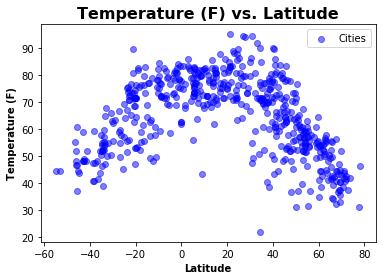

In [27]:
# plot 1: Temperature (F) vs. Latitude
plt1_x_axis = city_results_df["Latitude"]
plt1_y_axis = city_results_df["Temperature (F)"]

plt1 = plt.scatter(plt1_x_axis, plt1_y_axis, color="blue", 
                    label="Cities", alpha=0.5)

# set x and y axis labels
plt.xlabel('Latitude', fontweight="bold")
plt.ylabel('Temperature (F)', fontweight="bold")

# give the graph a title and legend
plt.title('Temperature (F) vs. Latitude', fontsize=16, fontweight="bold")
plt.legend(loc="best", fancybox=True)
plt.show()

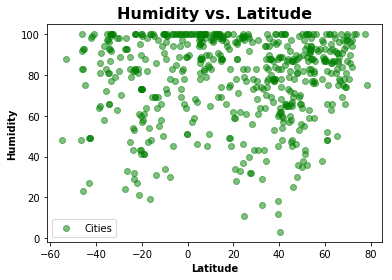

In [31]:
# plot 2: Humidity (%) vs. Latitude
plt2_x_axis = city_results_df["Latitude"]
plt2_y_axis = city_results_df["Humidity"]

plt2 = plt.scatter(plt2_x_axis, plt2_y_axis, color="green", 
                    label="Cities", alpha=0.5)

# set x and y axis labels
plt.xlabel('Latitude', fontweight="bold")
plt.ylabel('Humidity', fontweight="bold")

# give the graph a title and legend
plt.title('Humidity vs. Latitude', fontsize=16, fontweight="bold")
plt.legend(loc="best", fancybox=True)
plt.show()

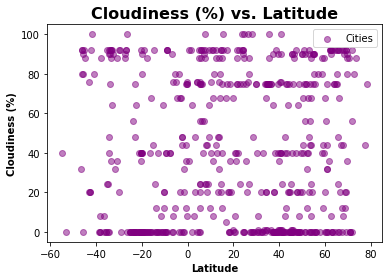

In [32]:
# plot 3: Cloudiness (%) vs. Latitude
plt3_x_axis = city_results_df["Latitude"]
plt3_y_axis = city_results_df["Cloudiness (%)"]

plt3 = plt.scatter(plt3_x_axis, plt3_y_axis, color="purple", 
                    label="Cities", alpha=0.5)

# set x and y axis labels
plt.xlabel('Latitude', fontweight="bold")
plt.ylabel('Cloudiness (%)', fontweight="bold")

# give the graph a title and legend
plt.title('Cloudiness (%) vs. Latitude', fontsize=16, fontweight="bold")
plt.legend(loc="best", fancybox=True)
plt.show()

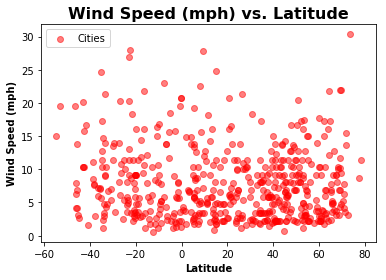

In [33]:
# plt1 = scatter plot of Temperature (F) vs. Latitude
# plt2 = scatter plot of Humidity (%) vs. Latitude
# plt3 = scatter plot of Cloudiness (%) vs. Latitude
# plt4 = scatter plot of Wind Speed (mph) vs. Latitude
# fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=False)

# plot 4: Wind Speed (mph) vs. Latitude
plt4_x_axis = city_results_df["Latitude"]
plt4_y_axis = city_results_df["Wind Speed (mph)"]

plt4 = plt.scatter(plt4_x_axis, plt4_y_axis, color="red", 
                    label="Cities", alpha=0.5)

# set x and y axis labels
plt.xlabel('Latitude', fontweight="bold")
plt.ylabel('Wind Speed (mph)', fontweight="bold")

# give the graph a title and legend
plt.title('Wind Speed (mph) vs. Latitude', fontsize=16, fontweight="bold")
plt.legend(loc="best", fancybox=True)
plt.show()